In [ ]:
# 1. Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

# 2. Load dataset
df = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data with attacks.xlsx")

# 3. Basic cleanup
df.dropna(inplace=True)  # Drop any rows with missing values

# 4. Identify features and label
target_col = df.columns[-1]  # Assuming last column is the attack flag (0 or 1)
X = df.drop(columns=[target_col])
X = X.drop(columns=['Date', 'Hours'])
y = df[target_col]

X.head()


,CONSUMERFLOW.DEFECT,CONSUMERFLOW,DEFECT.PUMP1,DEFECT.PUMP2,DEFECT.PUMP3,DEFECT.PUMP4,ENTRYFLOW.DEFECT,ENTRYFLOW,FLOW.PUMP1,FLOW.PUMP2,...,STATE.PUMP3,STATE.PUMP4,TANKLEVEL.DEFECT,TANKLEVEL.HIGH,TANKLEVEL.LOW,TANKLEVEL,CURRENT.FLOW.PUMP1,CURRENT.FLOW.PUMP2,CURRENT.FLOW.PUMP3,CURRENT.FLOW.PUMP4
0,0,230.30240,0,0,0,0,0,381.66983,250,250,...,0,0,0,0,0,2.599974,0,0,0,0
1,0,227.67735,0,0,0,0,0,375.41953,250,250,...,0,0,0,0,0,2.658923,0,0,0,0
2,0,225.05231,0,0,0,0,0,369.16922,250,250,...,0,0,0,0,0,2.721077,0,0,0,0
3,0,222.42726,0,0,0,0,0,362.91891,250,250,...,0,0,0,0,0,2.782188,0,0,0,0
4,0,219.80222,0,0,0,0,0,356.66861,250,250,...,0,0,0,0,0,2.842258,0,0,0,0


In [ ]:
# 5. Feature scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

X_scaled.head()


,CONSUMERFLOW.DEFECT,CONSUMERFLOW,DEFECT.PUMP1,DEFECT.PUMP2,DEFECT.PUMP3,DEFECT.PUMP4,ENTRYFLOW.DEFECT,ENTRYFLOW,FLOW.PUMP1,FLOW.PUMP2,...,STATE.PUMP3,STATE.PUMP4,TANKLEVEL.DEFECT,TANKLEVEL.HIGH,TANKLEVEL.LOW,TANKLEVEL,CURRENT.FLOW.PUMP1,CURRENT.FLOW.PUMP2,CURRENT.FLOW.PUMP3,CURRENT.FLOW.PUMP4
0,0.0,0.418732,0.0,0.0,0.0,0.0,0.0,0.563340,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.077536,0.0,0.0,0.0,0.0
1,0.0,0.413959,0.0,0.0,0.0,0.0,0.0,0.550839,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.084884,0.0,0.0,0.0,0.0
2,0.0,0.409186,0.0,0.0,0.0,0.0,0.0,0.538338,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.092632,0.0,0.0,0.0,0.0
3,0.0,0.404413,0.0,0.0,0.0,0.0,0.0,0.525838,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.100250,0.0,0.0,0.0,0.0
4,0.0,0.399640,0.0,0.0,0.0,0.0,0.0,0.513337,1.0,0.266667,...,0.0,0.0,0.0,0.0,0.0,0.107738,0.0,0.0,0.0,0.0


In [ ]:
# 6. Train/test split (stratified to preserve class ratio)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 7. Train XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
xgb.fit(X_train, y_train)

# 8. Evaluate
y_pred = xgb.predict(X_test)
print("🔍 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# 9. Save model (optional)
joblib.dump(xgb, "xgboost_attack_detector_areal.pkl")
joblib.dump(scaler, "xgboost_scaler_areal.pkl")

🔍 Confusion Matrix:
[[2306    0]
 [   0   44]]

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2306
           1       1.00      1.00      1.00        44

    accuracy                           1.00      2350
   macro avg       1.00      1.00      1.00      2350
weighted avg       1.00      1.00      1.00      2350



['xgboost_scaler_areal.pkl']

In [ ]:
# 1. Load libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib

# 2. Load dataset
df = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data with attacks.xlsx")

# 3. Basic cleanup
df.dropna(inplace=True)  # Drop any rows with missing values

# 4. Identify features and label
target_col = df.columns[-1]  # Assuming last column is the attack flag (0 or 1)
X = df.drop(columns=[target_col])
X = X.drop(columns=['Date ', 'Hours', 'DEFECT.PUMP1', 'DEFECT.PUMP2', 'DEFECT.PUMP3', 'DEFECT.PUMP4'])
y = df[target_col]

# 5. Feature scaling
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 6. Handle class imbalance
print("Before SMOTE:", y.value_counts())
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("After SMOTE:", pd.Series(y_resampled).value_counts())

# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# 8. Train XGBoost
xgb = XGBClassifier(n_estimators=300, learning_rate=0.1, max_depth=6, random_state=42)
xgb.fit(X_train, y_train)

# 9. Evaluate
y_pred = xgb.predict(X_test)
print("\n🔍 Evaluation Metrics:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

# 10. Save the model and scaler (optional)
joblib.dump(xgb, "xgboost_attack_detector.pkl")
joblib.dump(scaler, "xgboost_scaler.pkl")


Before SMOTE: ATT_FLAG
0    11486
1      261
Name: count, dtype: int64
After SMOTE: ATT_FLAG
0    11486
1    11486
Name: count, dtype: int64

🔍 Evaluation Metrics:
[[2283    0]
 [   0 2312]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2283
           1       1.00      1.00      1.00      2312

    accuracy                           1.00      4595
   macro avg       1.00      1.00      1.00      4595
weighted avg       1.00      1.00      1.00      4595



['xgboost_scaler.pkl']

                     Feature  Importance
5                 FLOW.PUMP2    0.408548
29                 TANKLEVEL    0.226023
26          TANKLEVEL.DEFECT    0.194402
4                 FLOW.PUMP1    0.039480
17     OUTPUTVALVE.FDC.CLOSE    0.039467
20  RESERVETANKVOLUME.DEFECT    0.038362
1               CONSUMERFLOW    0.014977
21         RESERVETANKVOLUME    0.008734
25               STATE.PUMP4    0.007109
23               STATE.PUMP2    0.007034


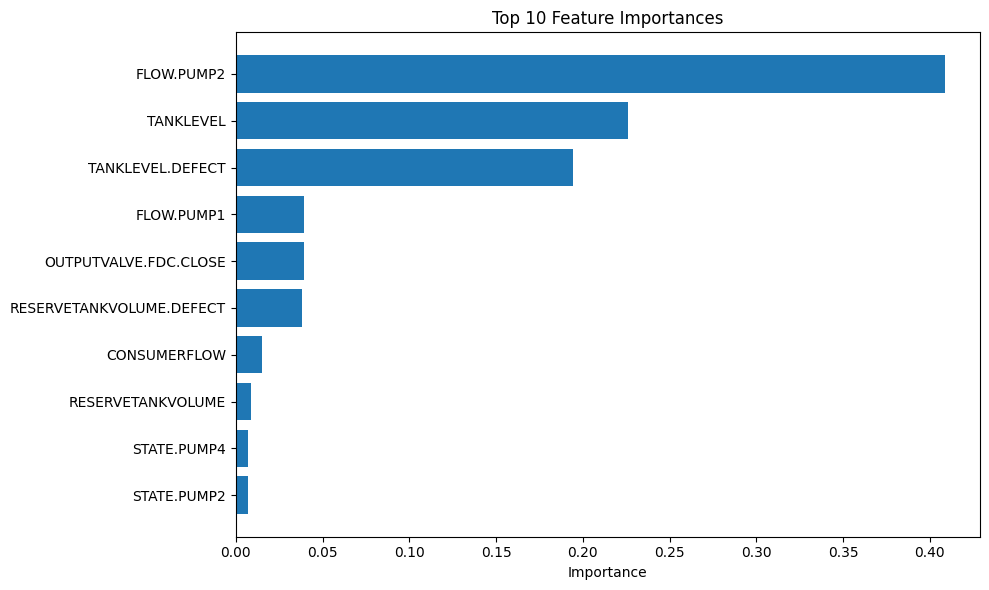

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your model is trained
importances = xgb.feature_importances_

# If you have feature names:
feature_names = X_scaled.columns if hasattr(X_scaled, 'columns') else [f'feat_{i}' for i in range(len(importances))]

# Create DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df.head(10))

# Optional: plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:10], feat_imp_df['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 10 Feature Importances")
plt.tight_layout()
plt.show()

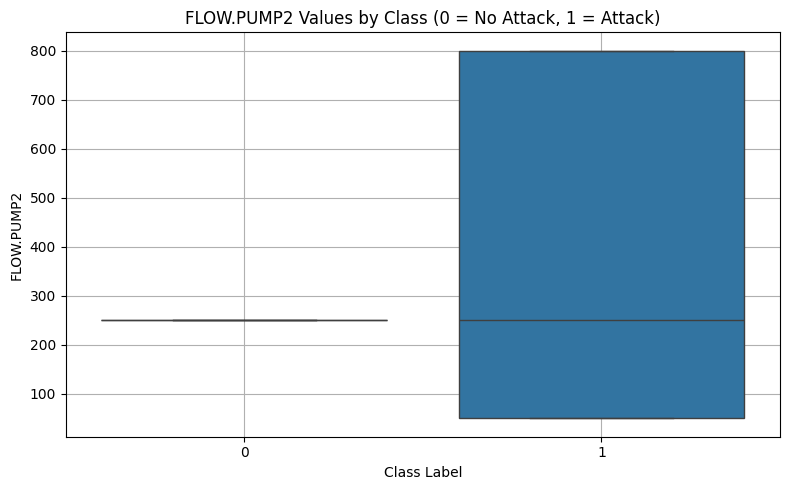

         count        mean         std    min    25%    50%    75%    max
label                                                                    
0      11486.0  250.000000    0.000000  250.0  250.0  250.0  250.0  250.0
1        261.0  341.954023  316.185823   50.0   50.0  250.0  800.0  800.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y into one DataFrame for easier plotting
df = X.copy()
df['label'] = y

# Plot distributions using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='FLOW.PUMP2')
plt.title('FLOW.PUMP2 Values by Class (0 = No Attack, 1 = Attack)')
plt.xlabel('Class Label')
plt.ylabel('FLOW.PUMP2')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print basic statistics
grouped_stats = df.groupby('label')['FLOW.PUMP2'].describe()
print(grouped_stats)

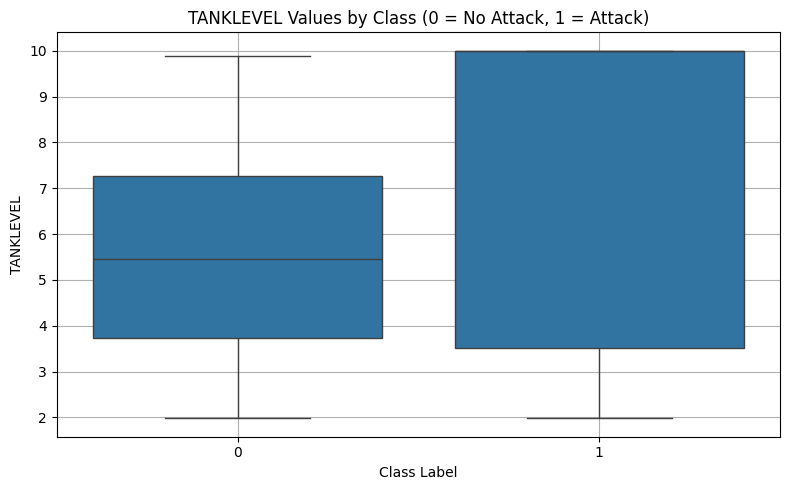

         count      mean       std       min       25%       50%        75%  \
label                                                                         
0      11486.0  5.497293  2.024958  1.977979  3.734867   5.44855   7.257261   
1        261.0  7.738756  3.292061  1.988160  3.503053  10.00000  10.000000   

             max  
label             
0       9.881399  
1      10.000000  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y into one DataFrame for easier plotting
df = X.copy()
df['label'] = y

# Plot distributions using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='TANKLEVEL')
plt.title('TANKLEVEL Values by Class (0 = No Attack, 1 = Attack)')
plt.xlabel('Class Label')
plt.ylabel('TANKLEVEL')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print basic statistics
grouped_stats = df.groupby('label')['TANKLEVEL'].describe()
print(grouped_stats)

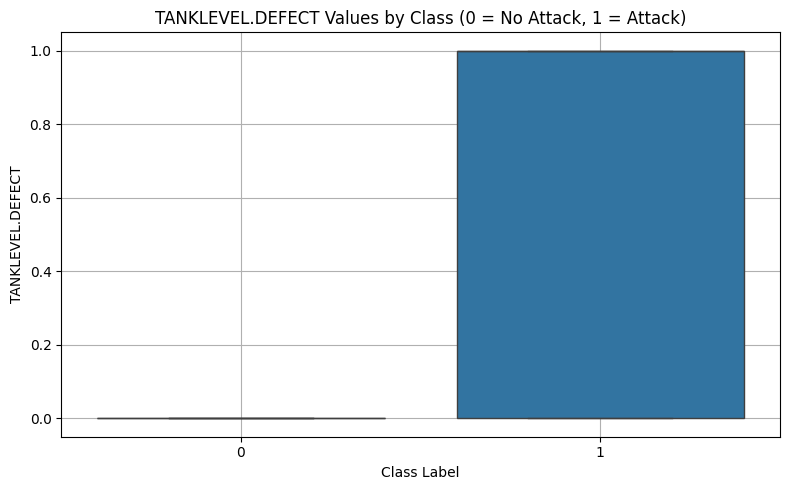

         count      mean       std  min  25%  50%  75%  max
label                                                      
0      11486.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        261.0  0.616858  0.487086  0.0  0.0  1.0  1.0  1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y into one DataFrame for easier plotting
df = X.copy()
df['label'] = y

# Plot distributions using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='TANKLEVEL.DEFECT')
plt.title('TANKLEVEL.DEFECT Values by Class (0 = No Attack, 1 = Attack)')
plt.xlabel('Class Label')
plt.ylabel('TANKLEVEL.DEFECT')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print basic statistics
grouped_stats = df.groupby('label')['TANKLEVEL.DEFECT'].describe()
print(grouped_stats)

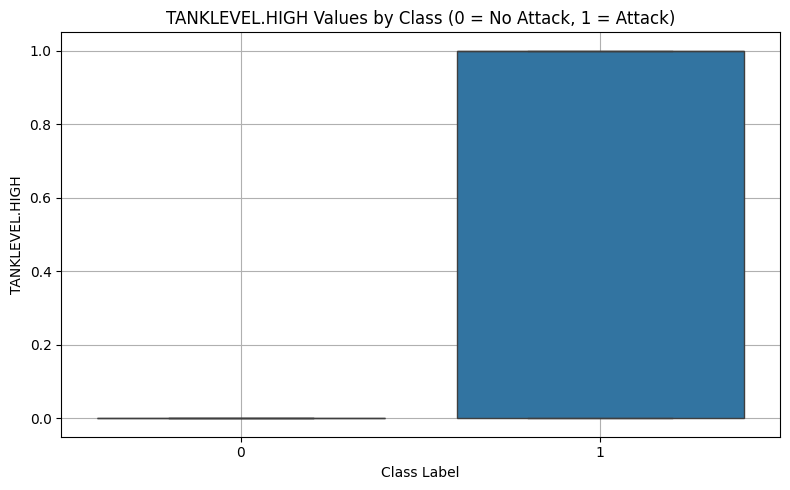

         count      mean       std  min  25%  50%  75%  max
label                                                      
0      11486.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
1        261.0  0.616858  0.487086  0.0  0.0  1.0  1.0  1.0


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Combine X and y into one DataFrame for easier plotting
df = X.copy()
df['label'] = y

# Plot distributions using a boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='label', y='TANKLEVEL.HIGH')
plt.title('TANKLEVEL.HIGH Values by Class (0 = No Attack, 1 = Attack)')
plt.xlabel('Class Label')
plt.ylabel('TANKLEVEL.HIGH')
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: print basic statistics
grouped_stats = df.groupby('label')['TANKLEVEL.HIGH'].describe()
print(grouped_stats)

LOCALIZATION


In [ ]:
import shutil
shutil.copy("/content/drive/MyDrive/CWDS_DEMO/aeed.py", "/content/")


'/content/aeed.py'

In [ ]:
import aeed
from aeed import AEED  # Import the AutoEncoder class


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import random
import os
import tensorflow as tf

# Import AEED model
from aeed import AEED, load_AEED
# Set fixed seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'  # Ensure deterministic TensorFlow behavior


In [ ]:
# Load dataset
df_train_orig = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data without attacks.xlsx")
# Create a combined datetime column
df_train_orig['DATETIME'] = pd.to_datetime(
    df_train_orig['Date '].dt.strftime('%Y-%m-%d') + ' ' + df_train_orig['Hours'].astype(str),
    dayfirst=True
)


# Drop non-sensor columns
sensor_cols = [col for col in df_train_orig.columns if col not in ['DATETIME', 'ATT_FLAG', 'Date ', 'Hours']]
X = df_train_orig[sensor_cols]

# Normalize the data
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=sensor_cols)

# Split into training & validation sets
X1, X2 = train_test_split(X_scaled, test_size=0.33, random_state=42)


<ipython-input-11-ca33d83a5dd6>:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_train_orig['DATETIME'] = pd.to_datetime(


In [ ]:
df_train_orig.head()

,Date,Hours,CONSUMERFLOW.DEFECT,CONSUMERFLOW,DEFECT.PUMP1,DEFECT.PUMP2,DEFECT.PUMP3,DEFECT.PUMP4,ENTRYFLOW.DEFECT,ENTRYFLOW,...,STATE.PUMP3,STATE.PUMP4,TANKLEVEL.DEFECT,TANKLEVEL.HIGH,TANKLEVEL.LOW,CURRENT.FLOW.PUMP1,CURRENT.FLOW.PUMP2,CURRENT.FLOW.PUMP3,CURRENT.FLOW.PUMP4,TANKLEVEL
0,2025-03-31,12:00:00,0,240.28798,0,0,0,0,0,405.47211,...,0,1,0,0,0,250,250,0,250,7.932540
1,2025-03-31,12:00:15,0,237.66295,0,0,0,0,0,399.22110,...,0,1,0,0,0,250,250,0,250,7.874702
2,2025-03-31,12:00:30,0,235.03745,0,0,0,0,0,392.96896,...,0,1,0,0,0,250,250,0,250,7.815823
3,2025-03-31,12:00:45,0,232.41246,0,0,0,0,0,386.71805,...,0,1,0,0,0,250,250,0,250,7.755900
4,2025-03-31,12:01:00,0,229.78696,0,0,0,0,0,380.46591,...,0,1,0,0,0,250,250,0,250,7.694937


In [ ]:
# Define model parameters
params = {
    'nI': X.shape[1],  # Number of input features
    'nH': 3,           # Number of hidden layers
    'cf': 2.3,         # Compression factor
    'activation': 'tanh',
    'verbose': 1,
}

# Initialize AutoEncoder
autoencoder = AEED(**params)
autoencoder.initialize()

# Train with early stopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=1e-4, mode='auto')
lr_reduced = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, min_delta=1e-4, mode='min')

autoencoder.train(X1.values, epochs=500, batch_size=32, shuffle=False,
                  callbacks=[earlyStopping, lr_reduced], validation_data=(X2.values, X2.values))


Created autoencoder with structure:
layer_0: 38, layer_1: 30, layer_2: 23, layer_3: 16, layer_4: 23, layer_5: 30, layer_6: 38
Epoch 1/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0379 - val_loss: 0.0071 - learning_rate: 0.0010
Epoch 2/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0048 - val_loss: 0.0021 - learning_rate: 0.0010
Epoch 3/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0017 - val_loss: 0.0013 - learning_rate: 0.0010
Epoch 4/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0012 - val_loss: 9.7203e-04 - learning_rate: 0.0010
Epoch 5/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 8.4267e-04 - val_loss: 7.1398e-04 - learning_rate: 0.0010
Epoch 6/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.0300e-04 - val_loss: 5.2985e-04 - learning_rate: 0.0010
Epoch 7/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.8013e-04 - val_loss: 4.5793e-04 - learning_rate: 0.0010
Epoch 8/500
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 4.1091e-

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load attack dataset
df_test_01 = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data with attacks.xlsx")
df_test_01['DATETIME'] = pd.to_datetime(
    df_test_01['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_test_01['Hours'].astype(str),
    dayfirst=True
)

# df_test_02 = pd.read_csv("/content/drive/MyDrive/CWDS_DEMO/BATADAL Datasets/BATADAL_test.csv", parse_dates=['DATETIME'], dayfirst=True)

# Normalize test data
X3 = pd.DataFrame(scaler.transform(df_test_01[sensor_cols]), columns=sensor_cols)
# X4 = pd.DataFrame(scaler.transform(df_test_02[sensor_cols]), columns=sensor_cols)

# Get true attack labels
Y3 = df_test_01['ATT_FLAG']
# Y4 = df_test_02['ATT_FLAG']

# Predict anomalies
_, validation_errors = autoencoder.predict(X2)
theta = validation_errors.mean(axis=1).quantile(0.99)  # Set threshold

# Apply detection
Yhat3, _ = autoencoder.detect(X3, theta=theta, window=4, average=True)
# Yhat4, _ = autoencoder.detect(X4, theta=theta, window=4, average=True)


results = pd.DataFrame(index=['test dataset 01'],
                       columns=['accuracy', 'f1_score', 'precision', 'recall'])


def compute_scores(Y, Yhat):
    return [
        accuracy_score(Y, Yhat),
        f1_score(Y, Yhat),
        precision_score(Y, Yhat),
        recall_score(Y, Yhat)
    ]


results.loc['test dataset 01'] = compute_scores(Y3, Yhat3)
# results.loc['test dataset 02'] = compute_scores(Y4, Yhat4)

print("Results:\n", results)




 40/119 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  

<ipython-input-14-055e0b66e844>:5: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_test_01['DATETIME'] = pd.to_datetime(


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Results:
                  accuracy  f1_score precision recall
test dataset 01  0.982634  0.719008   0.56129    1.0


In [ ]:
# Save the AEED Keras model as .h5
autoencoder.ann.save("/content/autoencoder_areal.h5", save_format='h5')

# Save the AEED parameters separately (custom logic)
import json
with open("/content/autoencoder_areal.json", "w") as f:
    json.dump(autoencoder.params, f)

print("✅ AEED model and parameters saved.")


✅ AEED model and parameters saved.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# 1. Get predictions and reconstruction errors
preds3, errors3 = autoencoder.predict(X3)

# 2. Look at reconstruction errors at a specific time (timestep 500)
timestep = 500
top_errors = errors3.iloc[timestep].sort_values(ascending=False).head(10)

# 3. Print them
print(f"Top reconstruction errors at timestep {timestep}:\n")
print(top_errors)


368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Top reconstruction errors at timestep 500:

RESERVETANKVOLUME       0.006018
TANKLEVEL               0.004277
STATE.PUMP2             0.001208
STATE.PUMP4             0.000854
CONSUMERFLOW            0.000741
OUTPUTFLOW              0.000202
STATE.PUMP1             0.000117
FLOW.PUMP1              0.000087
OUTPUTVALVE.FDC.OPEN    0.000063
INPUTVALVE.FDC.OPEN     0.000062
Name: 500, dtype: float64


Most suspicious time (highest total reconstruction error): 294

Top 5 suspicious sensors at timestep 294:
['FLOW.PUMP2', 'STATE.PUMP4', 'OUTPUTVALVE.FDC.OPEN', 'RESERVETANKVOLUME', 'STATE.PUMP3']


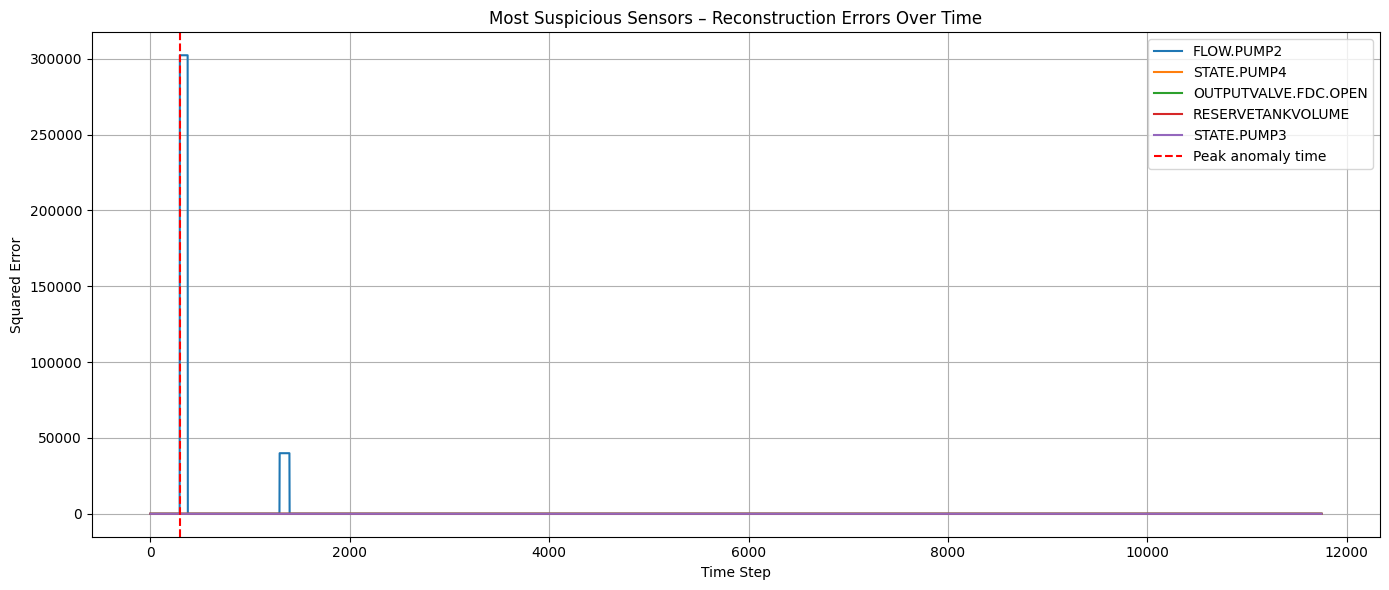

In [ ]:
import matplotlib.pyplot as plt

# Step 1: Choose a timestep where you suspect an attack is happening
# Or pick the one with highest total error
total_error_by_time = errors3.sum(axis=1)
most_suspicious_time = total_error_by_time.idxmax()
print(f"Most suspicious time (highest total reconstruction error): {most_suspicious_time}")

# Step 2: Find top N sensors with highest error at that timestep
N = 5
top_sensors = errors3.loc[most_suspicious_time].sort_values(ascending=False).head(N).index.tolist()
print(f"\nTop {N} suspicious sensors at timestep {most_suspicious_time}:")
print(top_sensors)

# Step 3: Plot reconstruction error over time for those sensors
plt.figure(figsize=(14, 6))
for sensor in top_sensors:
    plt.plot(errors3[sensor], label=sensor)

plt.axvline(x=most_suspicious_time, color='red', linestyle='--', label='Peak anomaly time')
plt.title("Most Suspicious Sensors – Reconstruction Errors Over Time")
plt.xlabel("Time Step")
plt.ylabel("Squared Error")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


368/368 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

🔍 Average reconstruction error per variable (attack samples):
FLOW.PUMP2                  2399.019317
FLOW.PUMP1                   340.906885
FLOW.PUMP3                   340.829934
TANKLEVEL.DEFECT               0.015095
TANKLEVEL.HIGH                 0.013312
STATE.PUMP2                    0.011202
RESERVETANKVOLUME              0.010616
RESERVETANKVOLUME.DEFECT       0.010514
STATE.PUMP4                    0.010168
STATE.PUMP3                    0.009216
TANKLEVEL                      0.008890
STATE.PUMP1                    0.008587
ENTRYFLOW                      0.007202
OUTPUTVALVE.FDC.OPEN           0.006942
OUTPUTVALVE.FDC.CLOSE          0.006519
OUTPUTFLOW                     0.005465
CONSUMERFLOW                   0.004381
INPUTVALVE.FDC.CLOSE           0.000553
INPUTVALVE.FDC.OPEN            0.000539
CONSUMERFLOW.DEFECT            0.000409
DEFECT.PUMP3                   0.000373
OUTPUTVALVE.OPEN               0.000237
DEFECT.PUMP2    

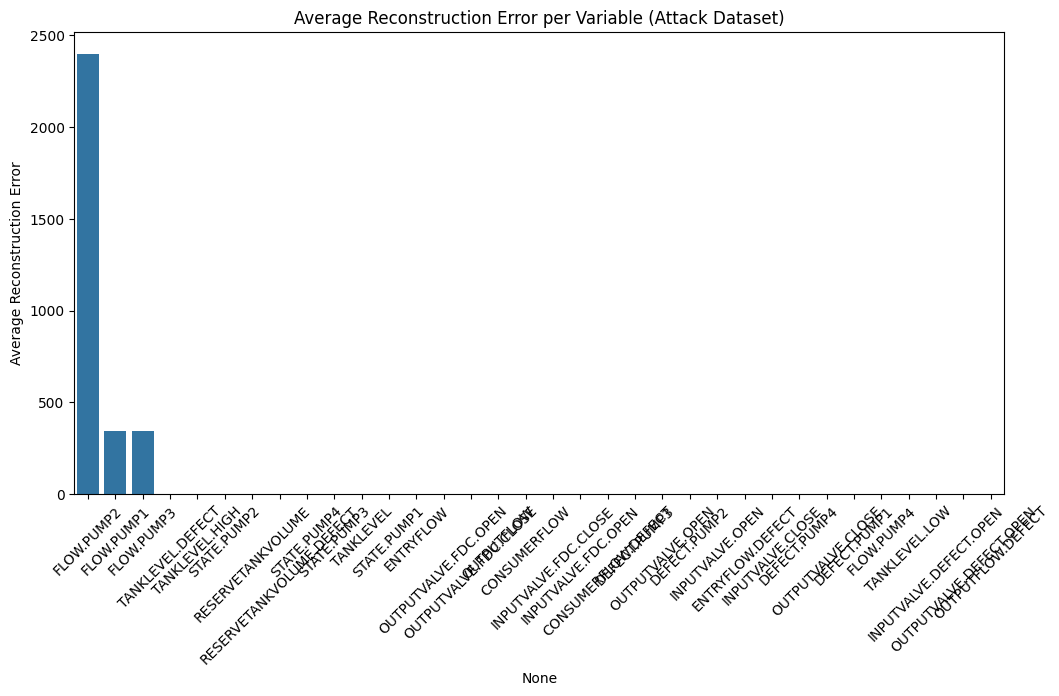

Streaming output truncated to the last 5000 lines.
[Row 6784] Most anomalous sensor: CONSUMERFLOW (error = 0.0044)
[Row 6785] Most anomalous sensor: CONSUMERFLOW (error = 0.0050)
[Row 6786] Most anomalous sensor: CONSUMERFLOW (error = 0.0056)
[Row 6787] Most anomalous sensor: CONSUMERFLOW (error = 0.0062)
[Row 6788] Most anomalous sensor: CONSUMERFLOW (error = 0.0067)
[Row 6789] Most anomalous sensor: CONSUMERFLOW (error = 0.0073)
[Row 6790] Most anomalous sensor: CONSUMERFLOW (error = 0.0079)
[Row 6791] Most anomalous sensor: CONSUMERFLOW (error = 0.0084)
[Row 6792] Most anomalous sensor: CONSUMERFLOW (error = 0.0089)
[Row 6793] Most anomalous sensor: CONSUMERFLOW (error = 0.0093)
[Row 6794] Most anomalous sensor: CONSUMERFLOW (error = 0.0031)
[Row 6795] Most anomalous sensor: CONSUMERFLOW (error = 0.0031)
[Row 6796] Most anomalous sensor: CONSUMERFLOW (error = 0.0030)
[Row 6797] Most anomalous sensor: CONSUMERFLOW (error = 0.0030)
[Row 6798] Most anomalous sensor: CONSUMERFLOW (error

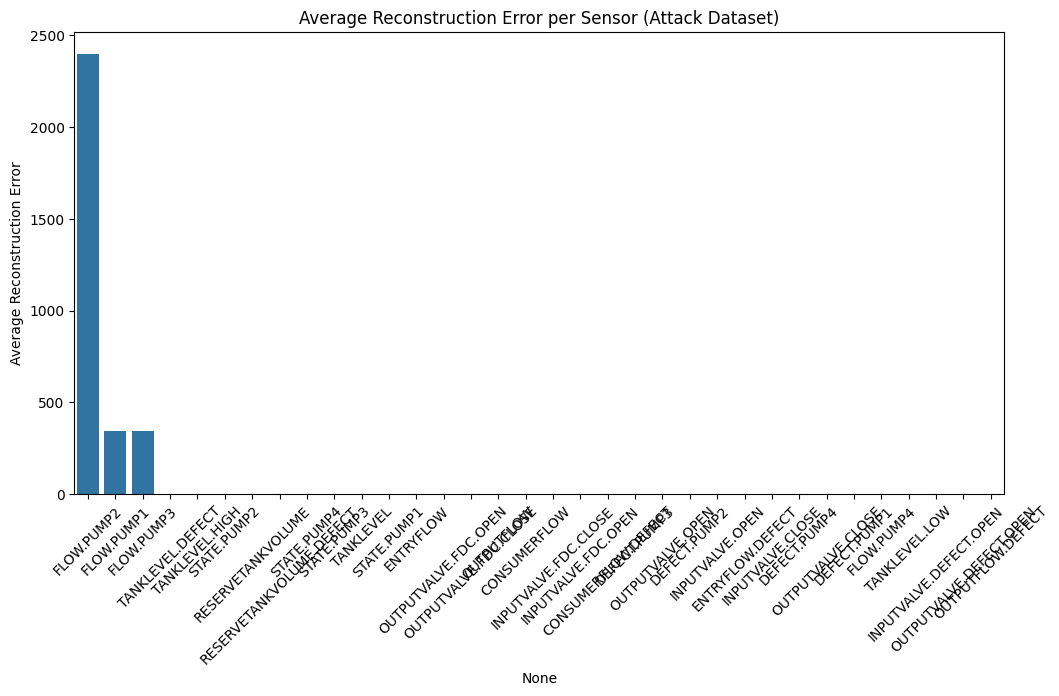


✅ Top 5 detected anomalous sensors: ['FLOW.PUMP2', 'FLOW.PUMP1', 'FLOW.PUMP3', 'TANKLEVEL.DEFECT', 'TANKLEVEL.HIGH']

🎯 Known attacked sensors correctly identified: {'FLOW.PUMP2', 'FLOW.PUMP1', 'FLOW.PUMP3'}
🔍 Localization coverage: 3 out of 4


In [ ]:
# --- Localization evaluation ---

# Step 1: Get reconstruction errors per variable for the attack dataset
_, errors_attack = autoencoder.predict(X3)  # rows = samples, cols = variables

# Step 2: Get most anomalous sensor per row (highest error)
detected_sensor = errors_attack.idxmax(axis=1)

# ---- OPTIONAL: if you know ground-truth attacked sensor for each row ----
# For example, assuming you manually create a Series listing the correct attacked sensor:
# true_sensor = pd.Series(['F_PU1', 'L_T1', 'F_PU1', 'L_T1', ....], index=df_test_01.index)

# But if no ground-truth exists per row → summarize which variables have higher average error in attacks:
average_errors = errors_attack.mean(axis=0).sort_values(ascending=False)
print("\n🔍 Average reconstruction error per variable (attack samples):")
print(average_errors)

# Step 3: Visualize the average errors (for thesis plot)
plt.figure(figsize=(12,6))
sns.barplot(x=average_errors.index, y=average_errors.values)
plt.xticks(rotation=45)
plt.ylabel("Average Reconstruction Error")
plt.title("Average Reconstruction Error per Variable (Attack Dataset)")
plt.show()

# Step 4: (optional) display detected sensor per row
for i in range(len(detected_sensor)):
    print(f"[Row {i}] Most anomalous sensor: {detected_sensor.iloc[i]} (error = {errors_attack.iloc[i][detected_sensor.iloc[i]]:.4f})")

# If you have true_sensor:
# localization_accuracy = (detected_sensor == true_sensor).mean()
# print(f"\n✅ Localization accuracy: {localization_accuracy*100:.2f}%")


# Known attacked sensors (manually from your scenario)
known_attacked_sensors = ['FLOW.PUMP2', 'FLOW.PUMP1', 'FLOW.PUMP3','OUTPUTVALVE.FDC.CLOSE']

# Compute average reconstruction error per sensor
average_errors = errors_attack.mean(axis=0).sort_values(ascending=False)

print("\n🔍 Average reconstruction error per sensor (attack dataset):")
print(average_errors)

# Plot it
plt.figure(figsize=(12,6))
sns.barplot(x=average_errors.index, y=average_errors.values)
plt.xticks(rotation=45)
plt.ylabel("Average Reconstruction Error")
plt.title("Average Reconstruction Error per Sensor (Attack Dataset)")
plt.show()

# Check which sensors are in top N
top_n = 5
top_detected_sensors = average_errors.head(top_n).index.tolist()

print(f"\n✅ Top {top_n} detected anomalous sensors: {top_detected_sensors}")

# Evaluate overlap
correctly_detected = set(known_attacked_sensors).intersection(top_detected_sensors)
print(f"\n🎯 Known attacked sensors correctly identified: {correctly_detected}")
print(f"🔍 Localization coverage: {len(correctly_detected)} out of {len(known_attacked_sensors)}")


CORRELATION (VALIDATION)


In [ ]:
df_train_orig = df_train_orig.drop(columns=['Date ', 'Hours','DATETIME'])
df_train_orig.head()

,CONSUMERFLOW.DEFECT,CONSUMERFLOW,DEFECT.PUMP1,DEFECT.PUMP2,DEFECT.PUMP3,DEFECT.PUMP4,ENTRYFLOW.DEFECT,ENTRYFLOW,FLOW.PUMP1,FLOW.PUMP2,...,RESERVETANKVOLUME.DEFECT,RESERVETANKVOLUME,STATE.PUMP1,STATE.PUMP2,STATE.PUMP3,STATE.PUMP4,TANKLEVEL.DEFECT,TANKLEVEL.HIGH,TANKLEVEL.LOW,TANKLEVEL
0,0,240.28798,0,0,0,0,0,405.47211,250,250,...,0,658.22797,1,1,0,1,0,0,0,7.932540
1,0,237.66295,0,0,0,0,0,399.22110,250,250,...,0,660.35687,1,1,0,1,0,0,0,7.874702
2,0,235.03745,0,0,0,0,0,392.96896,250,250,...,0,662.35364,1,1,0,1,0,0,0,7.815823
3,0,232.41246,0,0,0,0,0,386.71805,250,250,...,0,664.64734,1,1,0,1,0,0,0,7.755900
4,0,229.78696,0,0,0,0,0,380.46591,250,250,...,0,666.80908,1,1,0,1,0,0,0,7.694937


In [ ]:
correlation_matrix = df_train_orig.corr(method='kendall')


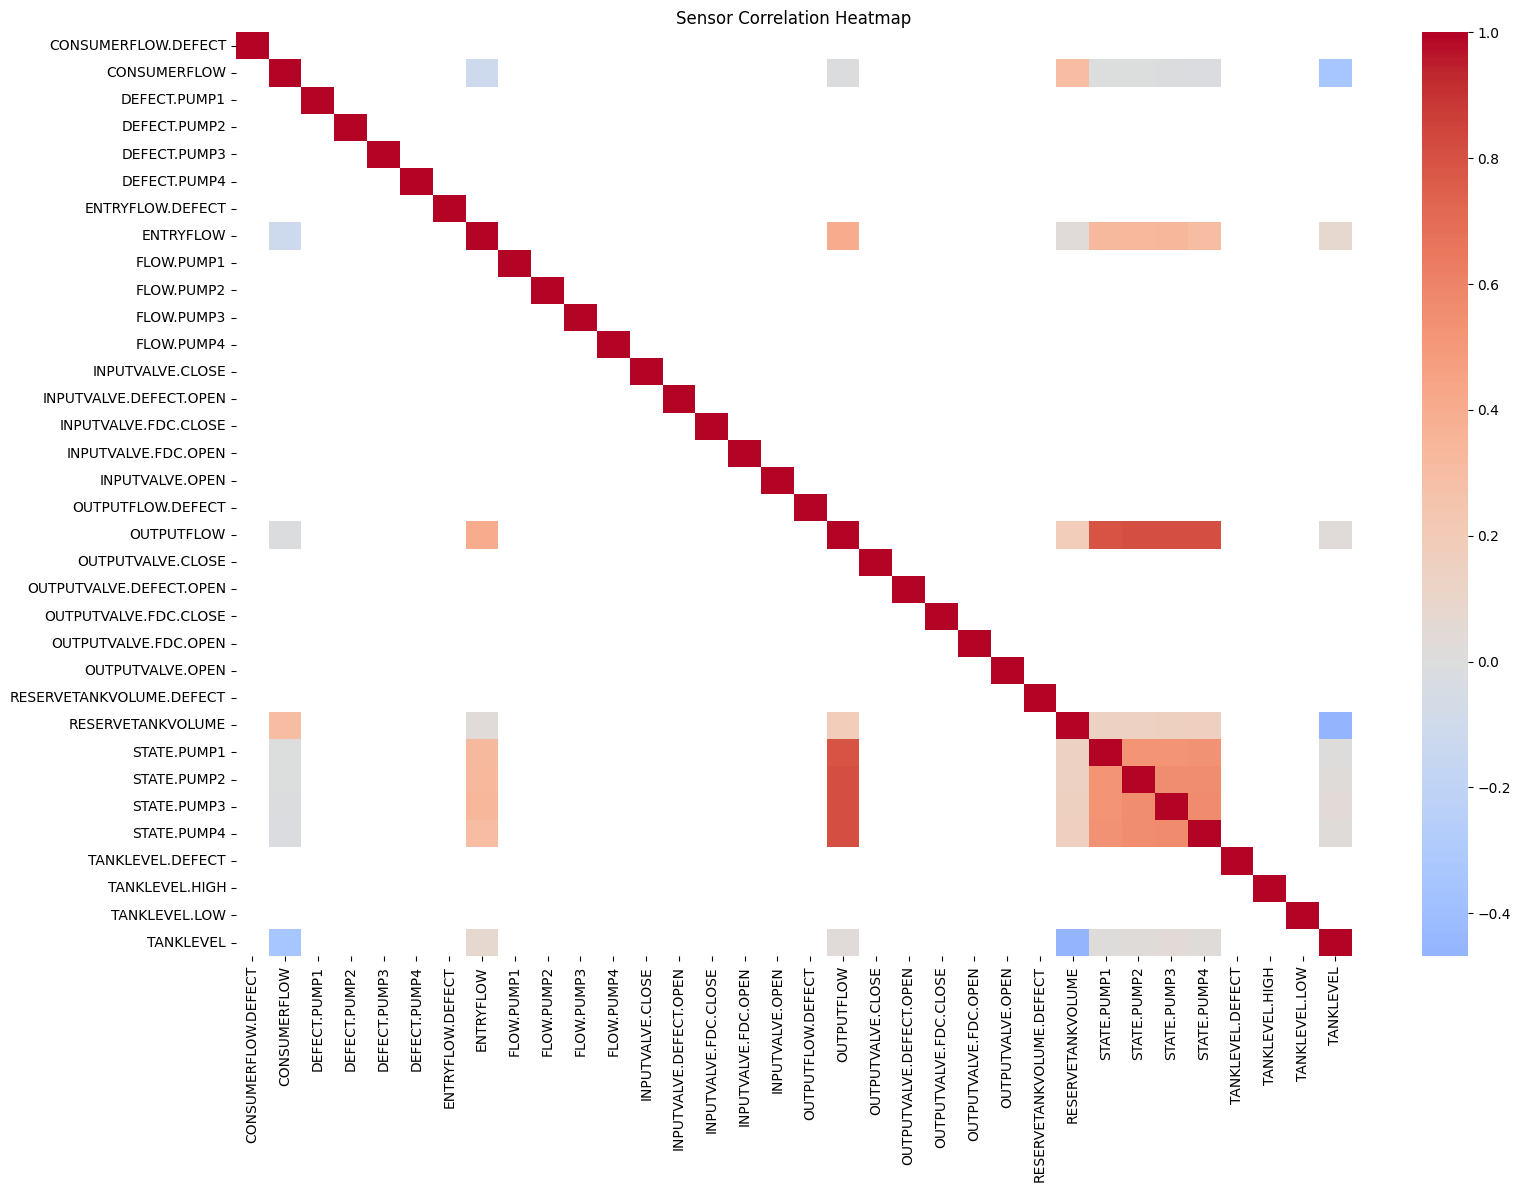

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df_corr = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data without attacks.xlsx")
# Create a combined datetime column
df_corr['DATETIME'] = pd.to_datetime(
    df_corr['Date '].dt.strftime('%Y-%m-%d') + ' ' + df_corr['Hours'].astype(str),
    dayfirst=True
)

# Step 2: Keep only numeric columns
df_numeric = df_corr.select_dtypes(include='number')

# Step 3: Compute Kendall correlation matrix
kendall_corr = df_numeric.corr(method='kendall')

# Step 4: Extract correlated variables above threshold
threshold = 0.6
correlation_map = {}

for sensor in kendall_corr.columns:
    # Keep only other variables with strong correlation (and not itself)
    related_sensors = kendall_corr[sensor][(kendall_corr[sensor].abs() > threshold) & (kendall_corr[sensor].abs() < 1.0)]
    if not related_sensors.empty:
        correlation_map[sensor] = related_sensors.sort_values(ascending=False).index.tolist()

# Step 5: Preview first few items in the map
for key, value in list(correlation_map.items())[:10]:
    print(f"{key}: {value}")


<ipython-input-19-b644cbc8a5ea>:7: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corr['DATETIME'] = pd.to_datetime(


OUTPUTFLOW: ['STATE.PUMP3', 'STATE.PUMP4', 'STATE.PUMP2', 'STATE.PUMP1']
STATE.PUMP1: ['OUTPUTFLOW']
STATE.PUMP2: ['OUTPUTFLOW']
STATE.PUMP3: ['OUTPUTFLOW']
STATE.PUMP4: ['OUTPUTFLOW']


In [ ]:
import pandas as pd
import numpy as np
import json

# Step 1: Load the dataset
df_corr = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data with attacks.xlsx")
# Create a combined datetime column
df_corr['DATETIME'] = pd.to_datetime(
    df_corr['Date '].dt.strftime('%Y-%m-%d') + ' ' + df_corr['Hours'].astype(str),
    dayfirst=True
)

# Step 2: Keep only numeric columns
df_numeric = df_corr.select_dtypes(include='number')

# Step 3: Compute Kendall correlation matrix
kendall_corr = df_numeric.corr(method='kendall')

# Step 4: Extract correlated variables above threshold (positive or negative)
threshold = 0.5
correlation_map = {}

for sensor in kendall_corr.columns:
    related_sensors = kendall_corr[sensor][(kendall_corr[sensor].abs() > threshold) & (kendall_corr[sensor].abs() < 1.0)]
    if not related_sensors.empty:
        # Store correlation values (signed)
        correlation_map[sensor] = related_sensors.to_dict()

# Step 5: Save the correlation map to a JSON file
with open("correlation_map_areal_attack.json", "w") as f:
    json.dump(correlation_map, f, indent=4)

print("✅ correlation_map_areal_attack.json saved successfully.")


<ipython-input-29-b5b977eb5dba>:8: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corr['DATETIME'] = pd.to_datetime(


✅ correlation_map_areal_attack.json saved successfully.


In [ ]:
corr_spearman = df['FLOW.PUMP3'].corr(df['OUTPUTFLOW'], method='pearson')
print(f"Spearman correlation: {corr_spearman:.4f}")


Spearman correlation: 0.0283


<ipython-input-25-6e0d875b58f2>:4: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corr['DATETIME'] = pd.to_datetime(


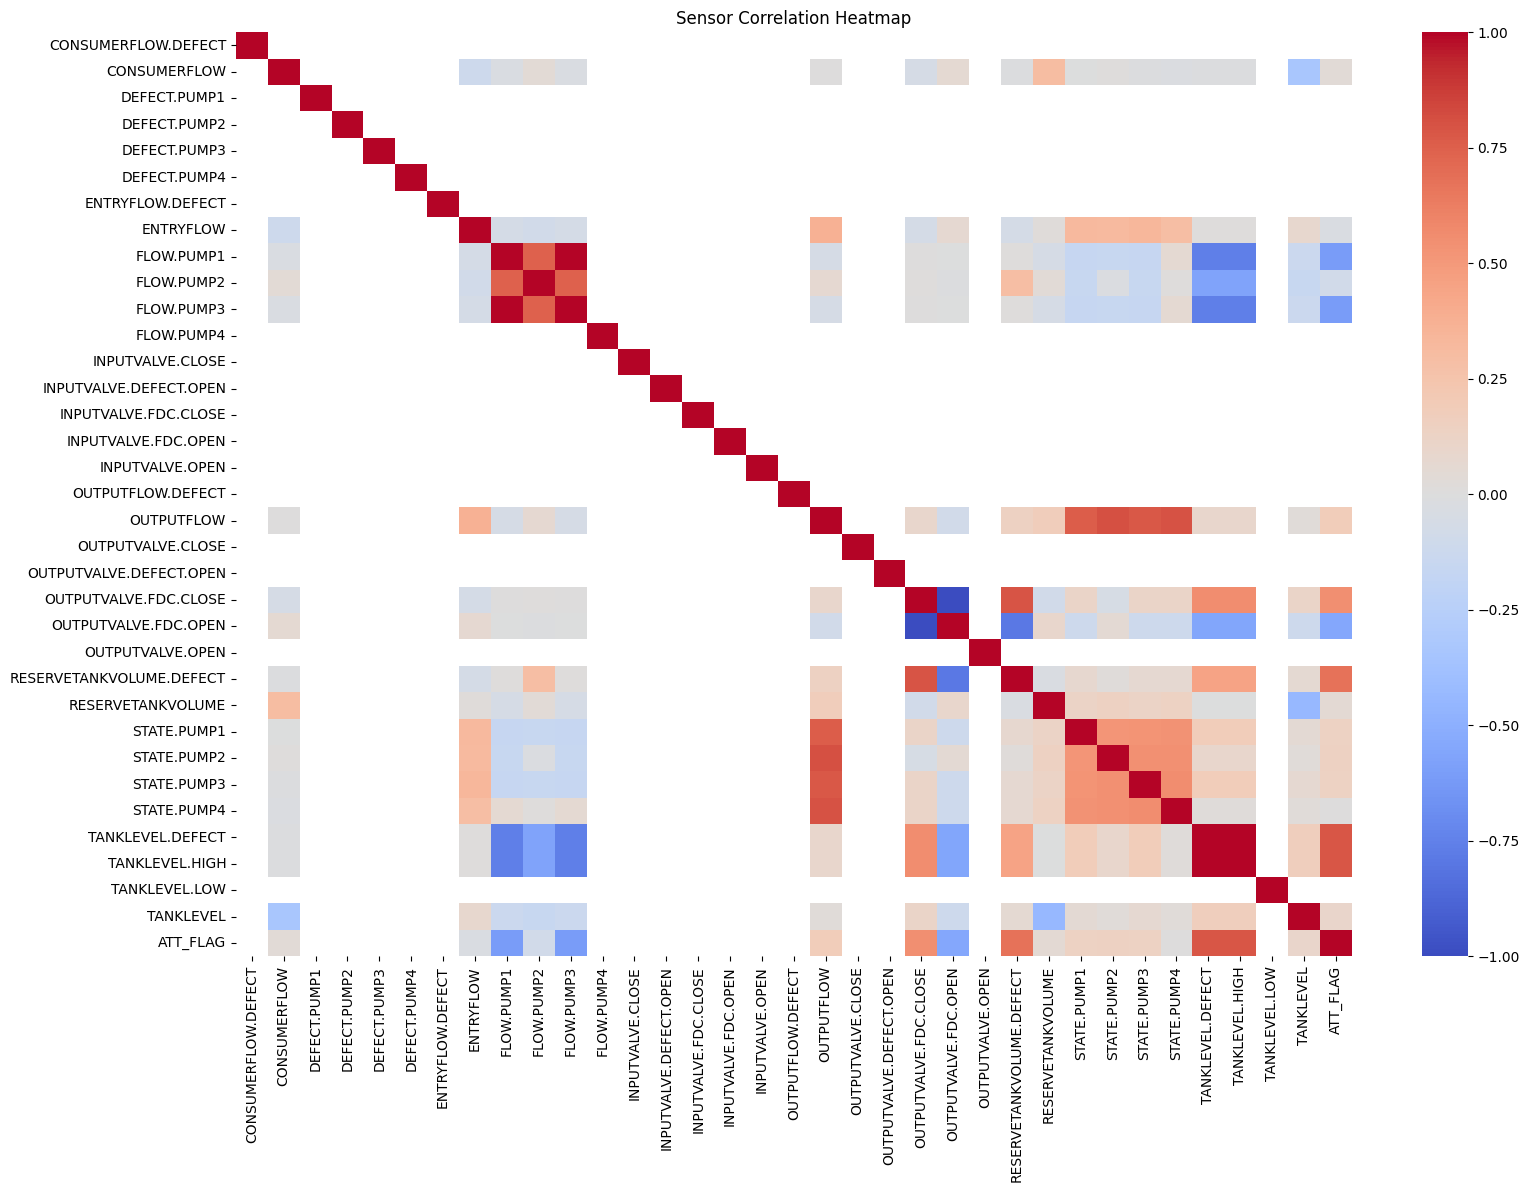

In [ ]:
# Load dataset
df_train_orig = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data with attacks.xlsx")
# Create a combined datetime column
df_corr['DATETIME'] = pd.to_datetime(
    df_corr['Date '].dt.strftime('%Y-%m-%d') + ' ' + df_corr['Hours'].astype(str),
    dayfirst=True
)

df_train_orig = df_train_orig.drop(columns=['Date ', 'Hours'])
df_train_orig.head()

correlation_matrix = df_train_orig.corr(method='kendall')

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load dataset
df_corr = pd.read_excel("/content/Data with attacks.xlsx")
# Create a combined datetime column
df_corr['DATETIME'] = pd.to_datetime(
    df_corr['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_corr['Hours'].astype(str),
    dayfirst=True
)

# df_corr = df_corr.drop(columns=['Date ', 'Hours','ATT_FLAG','STATE.PUMP1','STATE.PUMP2','STATE.PUMP4'])

# Step 2: Keep only numeric columns
df_numeric = df_corr.select_dtypes(include='number')

# Step 3: Compute Kendall correlation matrix
kendall_corr = df_numeric.corr(method='kendall')

# Step 4: Extract correlated variables above threshold
threshold = 0.5
correlation_map = {}

for sensor in kendall_corr.columns:
    # Keep only other variables with strong correlation (and not itself)
    related_sensors = kendall_corr[sensor][(kendall_corr[sensor].abs() > threshold) & (kendall_corr[sensor].abs() < 1.0)]
    if not related_sensors.empty:
        correlation_map[sensor] = related_sensors.sort_values(ascending=False).index.tolist()

# Step 5: Preview first few items in the map
for key, value in list(correlation_map.items())[:10]:
    print(f"{key}: {value}")


<ipython-input-1-81feb3af0afb>:7: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corr['DATETIME'] = pd.to_datetime(


FLOW.PUMP1: ['FLOW.PUMP2', 'ATT_FLAG', 'TANKLEVEL.DEFECT', 'TANKLEVEL.HIGH']
FLOW.PUMP2: ['FLOW.PUMP1', 'FLOW.PUMP3', 'TANKLEVEL.DEFECT', 'TANKLEVEL.HIGH']
FLOW.PUMP3: ['FLOW.PUMP2', 'ATT_FLAG', 'TANKLEVEL.DEFECT', 'TANKLEVEL.HIGH']
OUTPUTFLOW: ['CURRENT.FLOW.PUMP2', 'STATE.PUMP2', 'CURRENT.FLOW.PUMP4', 'STATE.PUMP4', 'CURRENT.FLOW.PUMP3', 'STATE.PUMP3', 'CURRENT.FLOW.PUMP1', 'STATE.PUMP1']
OUTPUTVALVE.FDC.CLOSE: ['RESERVETANKVOLUME.DEFECT', 'TANKLEVEL.DEFECT', 'TANKLEVEL.HIGH', 'ATT_FLAG']
OUTPUTVALVE.FDC.OPEN: ['ATT_FLAG', 'TANKLEVEL.DEFECT', 'TANKLEVEL.HIGH', 'RESERVETANKVOLUME.DEFECT']
RESERVETANKVOLUME.DEFECT: ['OUTPUTVALVE.FDC.CLOSE', 'ATT_FLAG', 'OUTPUTVALVE.FDC.OPEN']
STATE.PUMP1: ['CURRENT.FLOW.PUMP1', 'OUTPUTFLOW', 'CURRENT.FLOW.PUMP4', 'STATE.PUMP4', 'STATE.PUMP3', 'CURRENT.FLOW.PUMP3', 'STATE.PUMP2', 'CURRENT.FLOW.PUMP2']
STATE.PUMP2: ['CURRENT.FLOW.PUMP2', 'OUTPUTFLOW', 'CURRENT.FLOW.PUMP4', 'STATE.PUMP4', 'STATE.PUMP3', 'CURRENT.FLOW.PUMP3', 'STATE.PUMP1', 'CURRENT.FLOW.P

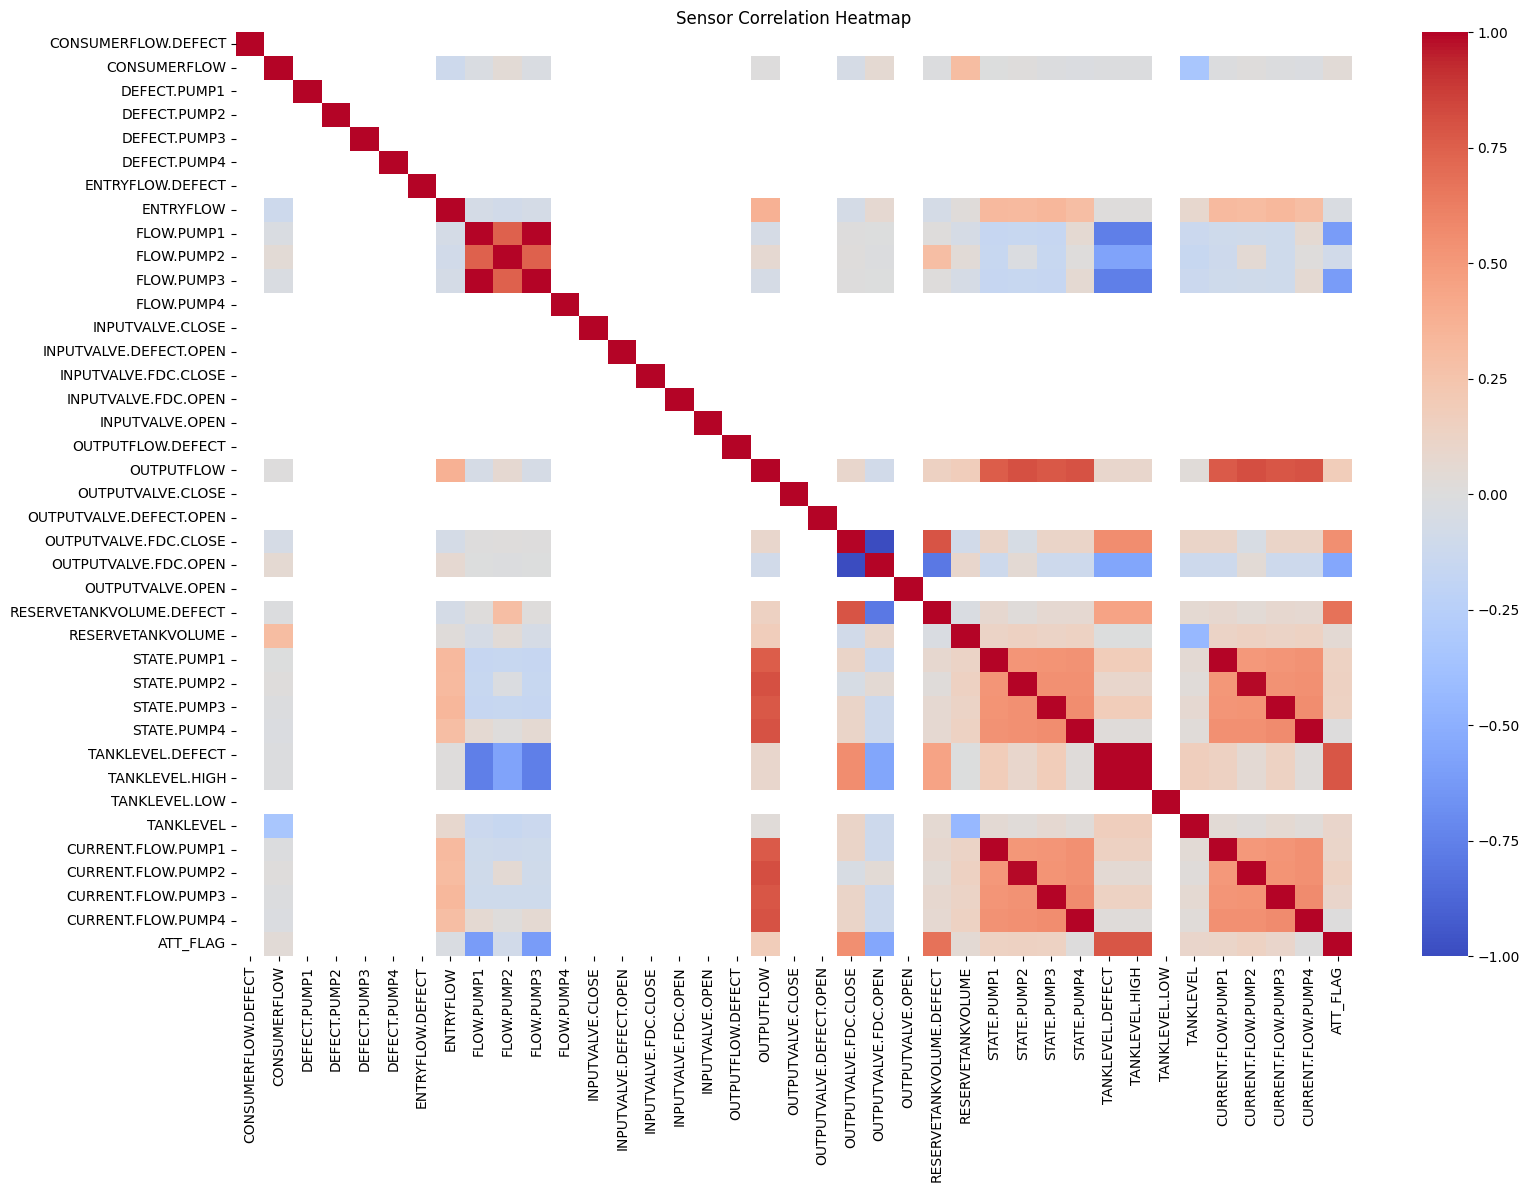

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 12))
sns.heatmap(kendall_corr, annot=False, cmap='coolwarm', center=0)
plt.title("Sensor Correlation Heatmap")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import json

# Step 1: Load the dataset
df_corr = pd.read_excel("/content/drive/MyDrive/CWDS_DEMO/Areal Dataset/Data with attacks.xlsx")
# Create a combined datetime column
df_corr['DATETIME'] = pd.to_datetime(
    df_corr['Date'].dt.strftime('%Y-%m-%d') + ' ' + df_corr['Hours'].astype(str),
    dayfirst=True
)

# Step 2: Keep only numeric columns
df_numeric = df_corr.select_dtypes(include='number')

# Step 3: Compute Kendall correlation matrix
kendall_corr = df_numeric.corr(method='kendall')

# Step 4: Extract correlated variables above threshold (positive or negative)
threshold = 0.5
correlation_map = {}

for sensor in kendall_corr.columns:
    related_sensors = kendall_corr[sensor][(kendall_corr[sensor].abs() > threshold) & (kendall_corr[sensor].abs() < 1.0)]
    if not related_sensors.empty:
        # Store correlation values (signed)
        correlation_map[sensor] = related_sensors.to_dict()

# Step 5: Save the correlation map to a JSON file
with open("correlation_map_areal_attack_fe.json", "w") as f:
    json.dump(correlation_map, f, indent=4)

print("✅ correlation_map_areal_attack_fe.json saved successfully.")


<ipython-input-17-054b31e9de8d>:8: UserWarning: Parsing dates in %Y-%m-%d %H:%M:%S format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_corr['DATETIME'] = pd.to_datetime(


✅ correlation_map_areal_attack_fe.json saved successfully.


Proving non-linear behavuoir

First few rows of the dataset:


,Date,Hours,CONSUMERFLOW.DEFECT,CONSUMERFLOW,DEFECT.PUMP1,DEFECT.PUMP2,DEFECT.PUMP3,DEFECT.PUMP4,ENTRYFLOW.DEFECT,ENTRYFLOW,...,STATE.PUMP3,STATE.PUMP4,TANKLEVEL.DEFECT,TANKLEVEL.HIGH,TANKLEVEL.LOW,CURRENT.FLOW.PUMP1,CURRENT.FLOW.PUMP2,CURRENT.FLOW.PUMP3,CURRENT.FLOW.PUMP4,TANKLEVEL
0,2025-03-31,12:00:00,0,240.28798,0,0,0,0,0,405.47211,...,0,1,0,0,0,250,250,0,250,7.932540
1,2025-03-31,12:00:15,0,237.66295,0,0,0,0,0,399.22110,...,0,1,0,0,0,250,250,0,250,7.874702
2,2025-03-31,12:00:30,0,235.03745,0,0,0,0,0,392.96896,...,0,1,0,0,0,250,250,0,250,7.815823
3,2025-03-31,12:00:45,0,232.41246,0,0,0,0,0,386.71805,...,0,1,0,0,0,250,250,0,250,7.755900
4,2025-03-31,12:01:00,0,229.78696,0,0,0,0,0,380.46591,...,0,1,0,0,0,250,250,0,250,7.694937


/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:100: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:101: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/misc.py:91: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(boundaries_list[i])


<Figure size 1000x1000 with 0 Axes>

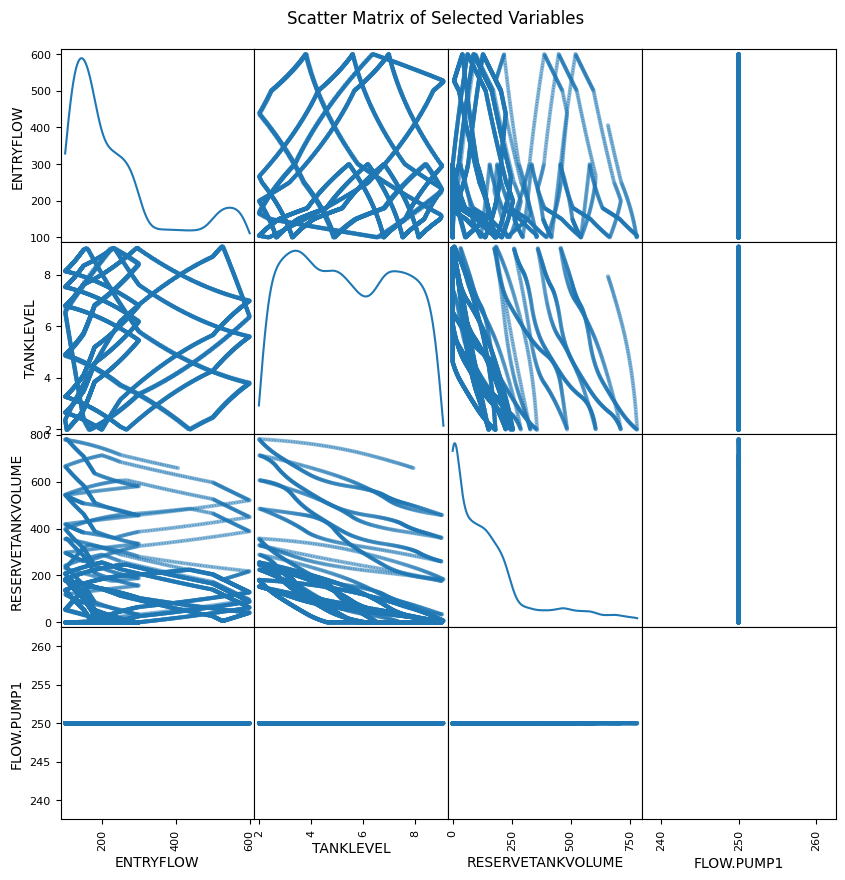

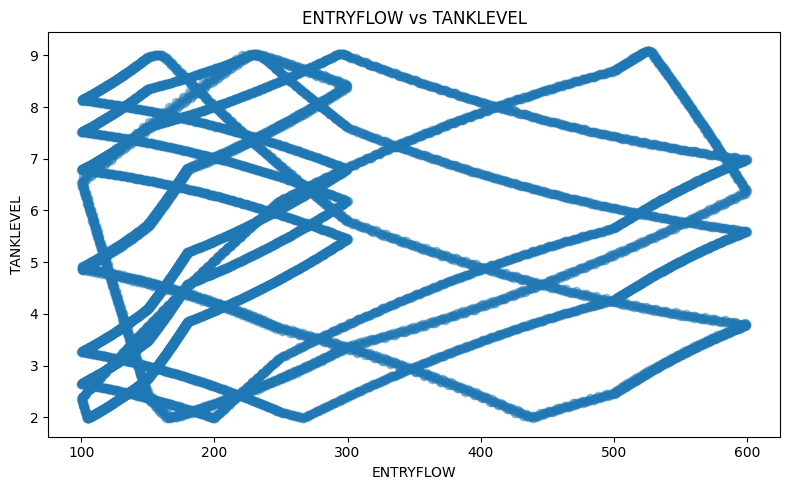

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Load the data
file_path = '/content/Data without attacks.xlsx'
df = pd.read_excel(file_path)

# Display the first few rows for context
print("First few rows of the dataset:")
display(df.head())

# Select numeric columns for demonstration of non-linearity
cols = ['ENTRYFLOW', 'TANKLEVEL', 'RESERVETANKVOLUME', 'FLOW.PUMP1']

# Drop rows with missing values in these columns
data = df[cols].dropna()

# Create scatter matrix to visualize relationships between variables
plt.figure(figsize=(10, 10))
scatter_matrix(data, figsize=(10, 10), diagonal='kde')
plt.suptitle('Scatter Matrix of Selected Variables', y=0.92)
plt.show()

# Create a specific scatter plot for ENTRYFLOW vs TANKLEVEL
plt.figure(figsize=(8, 5))
plt.scatter(df['ENTRYFLOW'], df['TANKLEVEL'], alpha=0.4)
plt.xlabel('ENTRYFLOW')
plt.ylabel('TANKLEVEL')
plt.title('ENTRYFLOW vs TANKLEVEL')
plt.tight_layout()
plt.show()
